In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [120]:
df = pd.read_excel("Data/Train_dataset.xlsx")
test_df = pd.read_excel("Data/Test_dataset.xlsx")

In [121]:
## See first few rows of dataset#####
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1,Farmer,Public,2,...,93,233,82,58,27,7,3600000,1300000,2,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2,Farmer,Walk,2,...,56,328,89,68,5,6,1600000,400000,1,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1,Cleaner,Public,2,...,137,213,77,43,40,6,3400000,900000,1,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1,Driver,Car,2,...,167,275,64,60,27,7,700000,2300000,1,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2,Manufacturing,Car,2,...,153,331,71,64,32,7,3200000,1100000,1,87.868800


In [122]:
test_df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


In [129]:
#imp = SimpleImputer(missing_values=np.nan,strategy="mean")
#df = imp.fit_transform(df)
#df.head().transpose()
df.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

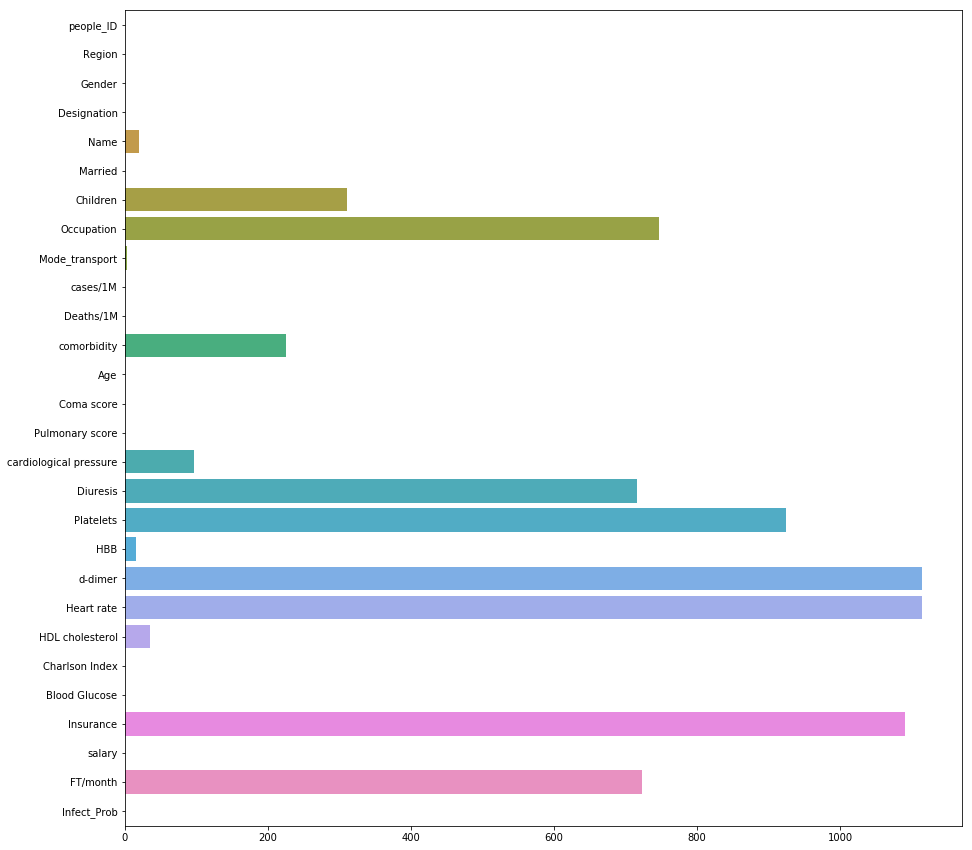

In [6]:
### Count total number of missing values ####
null = df.isnull().sum()
plt.figure(figsize=(15,15))
sns.barplot(x=null.values,y=null.index,orient="h")

In [7]:
test_df.isnull().sum()


people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      32
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
dtype: int64

In [8]:
test_df.shape

(14498, 27)

# Let's divide the data into two parts:

* Part A: Normal Data Features
 Features Included: Region, Gender, Designation,Name,Married,Children,Age,Occupation etc.
 
* Part B: Medical Data Features
 Features Included: Coma Score, Pulmonary Score,Cardiological Pressure,Diuresis,Platelets HBB,d-dimer etc.
 
 Now let's independently analyze the effects of these features on the infection probability


In [224]:
normie_df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,24,25,26,27]]
medical_df = df.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23,27]]
labels = df.iloc[:,-1]

In [10]:
normie_df_test = test_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,24,25,26]]
medical_df_test = test_df.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23]]
labels_test = test_df.iloc[:,-1]

In [11]:
normie_df_test.head().transpose()

,0,1,2,3,4
people_ID,5942,18664,5603,5649,5099
Region,Delhi,Delhi,Delhi,Delhi,Delhi
Gender,Female,Male,Female,Female,Female
Designation,Mrs,Mr,Mrs,Mrs,Mrs
Name,smt rekha prajapat,nirmal,pinky,pooja @aafrin,anjali
Married,YES,YES,YES,YES,YES
Children,2,2,2,2,2
Occupation,Driver,Legal,Sales,Sales,Business
Mode_transport,Public,Walk,Car,Car,Car
cases/1M,4,4,4,4,4


In [12]:
medical_df_test.head().transpose()

,0,1,2,3,4
people_ID,5942,18664,5603,5649,5099
Coma score,3,11,9,12,6
Pulmonary score,<200,<200,<100,<300,<200
cardiological pressure,Stage-01,Stage-01,Stage-02,Elevated,Stage-01
Diuresis,388,409,440,206,229
Platelets,153,95,40,78,109
HBB,196,138,166,83,207
d-dimer,240,241,236,211,312
Heart rate,85,81,88,87,94
HDL cholesterol,53,61,47,52,68


In [13]:
labels.head()

0    49.135010
1    51.147880
2    73.224000
3    48.779225
4    87.868800
Name: Infect_Prob, dtype: float64

# Analyzing Normal Data
Designation seems like a useless feature since married and gender cover it. So we can eliminate it easily

In [225]:
normie_df = normie_df.drop(["Designation"],axis=1)
normie_df = normie_df.drop(labels=["Name"],axis=1)
normie_df = normie_df.set_index("people_ID")
normie_df = normie_df.drop(labels=["Region"],axis=1)
normie_df = normie_df.drop(labels=["Deaths/1M"],axis=1)
normie_df = normie_df.dropna()


In [15]:
normie_df_test = normie_df_test.drop(["Designation"],axis=1)
normie_df_test = normie_df_test.drop(labels=["Name"],axis=1)
normie_df_test = normie_df_test.set_index("people_ID")
normie_df_test = normie_df_test.drop(labels=["Region"],axis=1)
normie_df_test = normie_df_test.drop(labels=["Deaths/1M"],axis=1)
normie_df_test = normie_df_test.dropna()

normie_df_test.head().transpose()


people_ID,5942,18664,5603,5649,5099
Gender,Female,Male,Female,Female,Female
Married,YES,YES,YES,YES,YES
Children,2,2,2,2,2
Occupation,Driver,Legal,Sales,Sales,Business
Mode_transport,Public,Walk,Car,Car,Car
cases/1M,4,4,4,4,4
comorbidity,Diabetes,Diabetes,Diabetes,None,Diabetes
Age,52,53,35,31,51
Insurance,3900000,1800000,5000000,3100000,2300000
salary,1300000,1300000,2000000,600000,1500000


In [102]:
normie_df_test.head().transpose()

,0,1,2,3,4
people_ID,5942,18664,5603,5649,5099
Region,Delhi,Delhi,Delhi,Delhi,Delhi
Gender,Female,Male,Female,Female,Female
Name,smt rekha prajapat,nirmal,pinky,pooja @aafrin,anjali
Married,YES,YES,YES,YES,YES
Children,2,2,2,2,2
Occupation,Driver,Legal,Sales,Sales,Business
Mode_transport,Public,Walk,Car,Car,Car
cases/1M,4,4,4,4,4
Deaths/1M,1,1,1,1,1


# Step 1: Remove clearly redundant features

* Cases/1M is the same for every place name. Clearly the feature can be used as a worthy label encoder for the place name since its magnitude is useful in this case i.e more the nunber of cases in the place more the probability of infection.

* Designation is a combination of marriage status and gender. Hence we can remove that too.

In [263]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def transform(data,indices,choice=None):
    onehot = OneHotEncoder()
    le = LabelEncoder()
    new_df = {}
    col_names = {}
    for index in  indices:
        temp_df = data.iloc[:,index]
    
        temp_df = temp_df.reshape(-1,1)
        
        if(choice==0):
            temp_df = le.fit_transform(temp_df)
        elif(choice==1):
            #t_temp_df = le.fit_transform(temp_df)
            t_temp_df = temp_df.reshape(-1,1)
            temp_df = onehot.fit_transform(t_temp_df)
        new_df[data.columns[index]] = temp_df
        #col_names[data.columns[index]] = onehot.categories_
    return new_df,col_names
    
    

In [262]:
#new_df,col_names = transform(normie_df,[0,1,3,4,6],0)
#clone = normie_df.copy()
#clone.head().transpose()
normie_df.head().transpose()

people_ID,1,2,3,4,5
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes
Age,68,64,19,33,23
Insurance,3.6e+06,1.6e+06,3.4e+06,700000,3.2e+06
salary,1300000,400000,900000,2300000,1100000


In [103]:
##TEST##
new_df,col_names = transform(normie_df,[0,1,3,4,6],0)
clone = normie_df.copy()
clone.head().transpose()

In [228]:
### IF ENCODING IS NUMERIC #####
for key in new_df.keys():
    if(key!="people_ID"):
        clone[key] = new_df[key]

###IF ENCODING IS ONE HOT #####

'''index = 0
flag = 0
for key in new_df.keys():
    
    test_df = pd.DataFrame(new_df[key])
    
    test_df.columns = col_names[key]
    test_df.index= clone.index
    if(flag==0):
        testing = test_df
        flag=1
    else:
        testing = pd.concat([testing,test_df],axis=1)
        clone = clone.drop(key,axis=1)
    
testing.head().transpose()'''

'index = 0\nflag = 0\nfor key in new_df.keys():\n    \n    test_df = pd.DataFrame(new_df[key])\n    \n    test_df.columns = col_names[key]\n    test_df.index= clone.index\n    if(flag==0):\n        testing = test_df\n        flag=1\n    else:\n        testing = pd.concat([testing,test_df],axis=1)\n        clone = clone.drop(key,axis=1)\n    \ntesting.head().transpose()'

In [269]:
test_df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


In [270]:
test_df = test_df.set_index("people_ID")
test_df = test_df.drop(["Region","Designation","Deaths/1M"],axis=1)

In [273]:
test_df = test_df.drop("Name",axis=1)
test_df.head().transpose()

people_ID,5942,18664,5603,5649,5099
Gender,Female,Male,Female,Female,Female
Married,YES,YES,YES,YES,YES
Children,2,2,2,2,2
Occupation,Driver,Legal,Sales,Sales,Business
Mode_transport,Public,Walk,Car,Car,Car
cases/1M,4,4,4,4,4
comorbidity,Diabetes,Diabetes,Diabetes,None,Diabetes
Age,52,53,35,31,51
Coma score,3,11,9,12,6
Pulmonary score,<200,<200,<100,<300,<200


In [276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
indices = [0,1,3,4,6]
for index in indices:
    arr = le.fit_transform(test_df.iloc[:,index])
    test_df[test_df.columns[index]] = arr


In [278]:
test_df["cardiological pressure"] = le.fit_transform(test_df["cardiological pressure"]) 

In [279]:
test_df.head().transpose()

people_ID,5942,18664,5603,5649,5099
Gender,0,1,0,0,0
Married,1,1,1,1,1
Children,2,2,2,2,2
Occupation,3,5,8,8,0
Mode_transport,1,2,0,0,0
cases/1M,4,4,4,4,4
comorbidity,1,1,1,3,1
Age,52,53,35,31,51
Coma score,3,11,9,12,6
Pulmonary score,<200,<200,<100,<300,<200


In [281]:
data_arr = []
for i in (test_df.index):
    data = test_df["Pulmonary score"][i]
    if(data==np.nan):
        print("WUWW")
        break
    data = data.lstrip("<")
    data_arr.append(data)

df_ps = pd.DataFrame(data_arr)
df_ps.index = test_df.index
test_df["Pulmonary score"] = df_ps

In [284]:
test_df_f_p = test_df.drop("Pulmonary score",axis=1)
test_df_f_p.head()

,Gender,Married,Children,Occupation,Mode_transport,cases/1M,comorbidity,Age,Coma score,cardiological pressure,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
people_ID,,,,,,,,,,,,,,,,,,,,,
5942,0,1,2,3,1,4,1,52,3,2,...,153,196,240,85,53,17,3,3900000,1300000,1
18664,1,1,2,5,2,4,1,53,11,2,...,95,138,241,81,61,2,5,1800000,1300000,1
5603,0,1,2,8,0,4,1,35,9,3,...,40,166,236,88,47,24,3,5000000,2000000,2
5649,0,1,2,8,0,4,3,31,12,0,...,78,83,211,87,52,13,6,3100000,600000,2
5099,0,1,2,0,0,4,1,51,6,2,...,109,207,312,94,68,39,5,2300000,1500000,1


In [285]:
test_pred = model3.predict(test_df_f_p)

In [288]:
final_preds = pd.DataFrame(test_pred)
final_preds.index = test_df_f_p.index
final_preds

,0
people_ID,
5942,52.571291
18664,52.606137
5603,52.413724
5649,52.366527
5099,52.466158
18749,52.293735
5228,52.145560
5559,52.486196
5220,52.331094


In [ ]:
test_preds.to_csv("output")

In [86]:
index = 0
flag = 0
for key in new_df.keys():
    
    test_df = pd.DataFrame(new_df[key])
    
    test_df.columns = col_names[key]
    test_df.index= clone_test.index
    if(flag==0):
        testing_test = test_df
        flag=1
    else:
        testing_test = pd.concat([testing,test_df],axis=1)
        clone_test = clone_test.drop(key,axis=1)
    
testing_test.head().transpose()

NameError: name 'clone_test' is not defined

In [87]:
final_df = pd.concat([clone,testing],axis=1)

In [230]:
#clone = clone.set_index("people_ID")
#clone.head().transpose()
#len(new_df["Gender"].toarray())
clone = clone.dropna()
#final_df.shape
clone.head().transpose()

people_ID,1,2,3,4,5
Gender,0.00000,0.00000,0.000,0.000000,0.0000
Married,1.00000,1.00000,0.000,1.000000,0.0000
Children,1.00000,2.00000,1.000,1.000000,2.0000
Occupation,4.00000,4.00000,1.000,3.000000,6.0000
Mode_transport,1.00000,2.00000,1.000,0.000000,0.0000
cases/1M,2.00000,2.00000,2.000,2.000000,2.0000
comorbidity,2.00000,1.00000,3.000,0.000000,1.0000
Age,68.00000,64.00000,19.000,33.000000,23.0000
Insurance,3600000.00000,1600000.00000,3400000.000,700000.000000,3200000.0000
salary,1300000.00000,400000.00000,900000.000,2300000.000000,1100000.0000


In [223]:
clone_labs

people_ID
1        49.135010
2        51.147880
3        73.224000
4        48.779225
5        87.868800
6        49.518345
7        49.670361
8        49.121025
9        48.531922
10       48.475097
11       46.970339
12       45.494822
14       48.948107
15       49.611328
16       47.888912
17       51.009536
18       47.207078
19       48.868666
20       50.180430
23       77.129280
24       46.698926
25       41.005440
26       48.050225
27       51.576403
28       49.104399
29       49.424097
30       49.559846
33       49.573003
34       49.763026
35       51.578046
           ...    
22660    45.780613
22661    55.225344
22662    53.721942
22663    54.339977
22664    51.349832
22665    53.612072
22666    46.681280
22667    60.929442
22670    60.131988
22671    54.917978
22673    51.148002
22675    92.750400
22676    45.884754
22677    45.595862
22678    53.858163
22679    59.869682
22680    54.673920
22681    59.188997
22682    52.927680
22683    46.943607
22684    53.944690
22

In [166]:
#clone = clone.drop(["Region"],axis=1)
#clone_labs = clone["Infect_Prob"]
df_labs = df["Infect_Prob"]
#clone = clone.drop(labels=["Infect_Prob"],axis=1)

In [182]:
df_labs.index = df["people_ID"]
f_df = pd.concat([f_df,df_labs],axis=1).dropna()

# Dummy Model

In [232]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

'''scaler = StandardScaler()
scaled = scaler.fit_transform(final_df.iloc[:,:6])
clone.iloc[:,:6] = scaled
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(final_df,clone_labs,test_size=0.2)'''

#from sklearn.feature_selection import SelectKBest, chi2
#sk_best = SelectKBest(chi2, k=9)
#X_new = sk_best.fit_transform(clone,clone_labs.astype("int"))

#total_df.dropna(inplace = True)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(clone.iloc[:,:-1],clone.iloc[:,-1],test_size=0.2)


In [267]:
from sklearn.model_selection import KFold
kfold = KFold(10, True, 1)
#model3 = RandomForestRegressor()
from sklearn.metrics import r2_score

# enumerate splits
for train, test in kfold.split(f_df.iloc[:,:-1]):
    X_train,X_test = f_df.iloc[train,:-1], f_df.iloc[test,:-1]
    Y_train,Y_test = f_df.iloc[train,-1],f_df.iloc[test,-1]
    model3.fit(X_train,Y_train)
    y_pred = model3.predict(X_test)
    print(r2_score(Y_test,y_pred))

'''for train, test in kfold.split(clone):
    X_train,X_test = clone.iloc[train,:-1], clone.iloc[test,:-1]
    Y_train,Y_test = clone.iloc[train,-1],clone.iloc[test,-1]
    model3.fit(X_train,Y_train)
    y_pred = model3.predict(X_test)
    print(r2_score(Y_test,y_pred))'''

    
    

0.22033018947769578
0.22644358855128777
0.2825912226241797
0.34542368781743604
0.2822444294719384
0.299531769862847
0.3389043997824812
0.22700247445437605
0.37570192181948725
0.19243385651184597


'for train, test in kfold.split(clone):\n    X_train,X_test = clone.iloc[train,:-1], clone.iloc[test,:-1]\n    Y_train,Y_test = clone.iloc[train,-1],clone.iloc[test,-1]\n    model3.fit(X_train,Y_train)\n    y_pred = model3.predict(X_test)\n    print(r2_score(Y_test,y_pred))'

In [236]:
##### GRID SEARCH CV #####
from sklearn.model_selection import GridSearchCV
model3 = RandomForestRegressor()
parameters = {"n_estimators":[10,20,50],"criterion":["mse","mae"],"min_samples_split":[5,8,10],"min_weight_fraction_leaf":[0.2]}
clf = GridSearchCV(model3,parameters)
clf.fit(clone.iloc[:,:-1],clone.iloc[:,-1])

/home/rosguy/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'

In [237]:
model3 = clf.best_estimator_


In [238]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#model1 = DecisionTreeRegressor()
#model2 = SVR(kernel="linear")
model3 = RandomForestRegressor()
model3.fit(X_train,Y_train)
#X_test.iloc[:,:6] = scaler.fit_transform(X_test.iloc[:,:6])
y_pred = model3.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)


/home/rosguy/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1116000534327487

In [235]:
X_train.shape

(6968, 9)

In [197]:
##### NN ######
from keras.models import Sequential
from keras.layers import Dense,Input,BatchNormalization
from keras.regularizers import l1,l2
model = Sequential()
model.add(Dense(8,input_shape=(7,),activation="relu"))
model.add(BatchNormalization())
model.add(Dense(8,activation="relu"))
model.add(BatchNormalization())
#model.add(Dense(16,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(1,activation="linear"))

In [198]:
model.compile(optimizer="Adam",loss="mean_squared_logarithmic_error",metrics=["mse"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 8)                 64        
_________________________________________________________________
batch_normalization_21 (Batc (None, 8)                 32        
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_22 (Batc (None, 8)                 32        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 209
Trainable params: 177
Non-trainable params: 32
_________________________________________________________________


In [199]:
model.fit(X_train,Y_train,validation_data=[X_test,Y_test],epochs=20)

Train on 6968 samples, validate on 1742 samples
Epoch 1/20
6968/6968 [==============================] - 1s 126us/step - loss: 10.9725 - mse: 2779.7212 - val_loss: 7.7935 - val_mse: 2527.8350
Epoch 2/20
6968/6968 [==============================] - 0s 56us/step - loss: 7.9891 - mse: 2647.4741 - val_loss: 7.3705 - val_mse: 2569.7302
Epoch 3/20
6968/6968 [==============================] - 0s 55us/step - loss: 5.8067 - mse: 2458.7634 - val_loss: 4.9302 - val_mse: 2322.9636
Epoch 4/20
6968/6968 [==============================] - 0s 55us/step - loss: 3.8443 - mse: 2181.7173 - val_loss: 3.0531 - val_mse: 2029.1415
Epoch 5/20
6968/6968 [==============================] - 0s 55us/step - loss: 2.6848 - mse: 1935.1528 - val_loss: 2.2570 - val_mse: 1811.0577
Epoch 6/20
6968/6968 [==============================] - 0s 54us/step - loss: 1.9922 - mse: 1717.3058 - val_loss: 1.7258 - val_mse: 1614.0920
Epoch 7/20
6968/6968 [==============================] - 0s 59us/step - loss: 1.5187 - mse: 1519.0270 - v

In [200]:
y_pred = model.predict(X_test)
r2_score(Y_test,y_pred)

-0.7990969897268958

In [112]:
#comparison_df = np.concatenate((y_pred.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
#pd.DataFrame(comparison_df)

# Plot Features against Infect Probability

In [58]:
def plot_corrs(dframe,dim1,dim2,label="Infec_Prob"):
    fig,ax = plt.subplots(dim1,dim2,figsize=(15,15))
    count = 1
    for i in range(dim1):
        for j in range(dim2):
            ax[i,j].scatter(dframe.iloc[:,count],dframe.iloc[:,-1])
            ax[i,j].set_xlabel(dframe.columns[count])
            ax[i,j].set_ylabel(label)

            count+=1


In [174]:
clone.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes


# Data Grouping Approach
* Analyze data grouped by place. See if any correlation exists within a particular locality

In [120]:
df_list = []
for city in df["Region"].unique():
    temp_df = clone[clone["Region"]==city]
    df_list.append(temp_df)
    

In [151]:
#new_df,col_names = transform(clone,[0,1,3,4,7],0)
reg_list = []
new_dflist = []
for dfs in df_list:
    dfs = dfs.set_index("people_ID")
    reg_list.append(dfs["Region"].values[0])
    if("Region" in dfs.keys()):
        dfs = dfs.drop(["Region"],axis=1)
    new_dfs,col_names = transform(dfs,[0,1,3,4,7],0)
    for key in new_dfs.keys():
        dfs[key]=new_dfs[key]
    df_encoded = dfs
    new_dflist.append(df_encoded)
    
    

In [153]:
##TESTER3##
new_dflist[0].head().transpose()

people_ID,1,2,3,4,5
Gender,0.00000,0.00000,0.000,0.000000,0.0000
Married,1.00000,1.00000,0.000,1.000000,0.0000
Children,1.00000,2.00000,1.000,1.000000,2.0000
Occupation,4.00000,4.00000,1.000,3.000000,6.0000
Mode_transport,1.00000,2.00000,1.000,0.000000,0.0000
cases/1M,2.00000,2.00000,2.000,2.000000,2.0000
Deaths/1M,0.00000,0.00000,0.000,0.000000,0.0000
comorbidity,2.00000,1.00000,3.000,0.000000,1.0000
Age,68.00000,64.00000,19.000,33.000000,23.0000
Insurance,3600000.00000,1600000.00000,3400000.000,700000.000000,3200000.0000


In [158]:
new_dflist[1].head().transpose()

people_ID,1268,1269,1270,1271,1272
Gender,0.000000,0.000000,0.000000,0.00000,0.0000
Married,1.000000,1.000000,1.000000,1.00000,0.0000
Children,1.000000,2.000000,1.000000,2.00000,2.0000
Occupation,4.000000,0.000000,3.000000,6.00000,2.0000
Mode_transport,0.000000,0.000000,2.000000,0.00000,2.0000
cases/1M,2.000000,2.000000,2.000000,2.00000,2.0000
Deaths/1M,0.000000,0.000000,0.000000,0.00000,0.0000
comorbidity,1.000000,0.000000,3.000000,0.00000,0.0000
Age,64.000000,27.000000,67.000000,66.00000,19.0000
Insurance,2100000.000000,3000000.000000,3500000.000000,4300000.00000,4000000.0000


TITLE:  Bengaluru


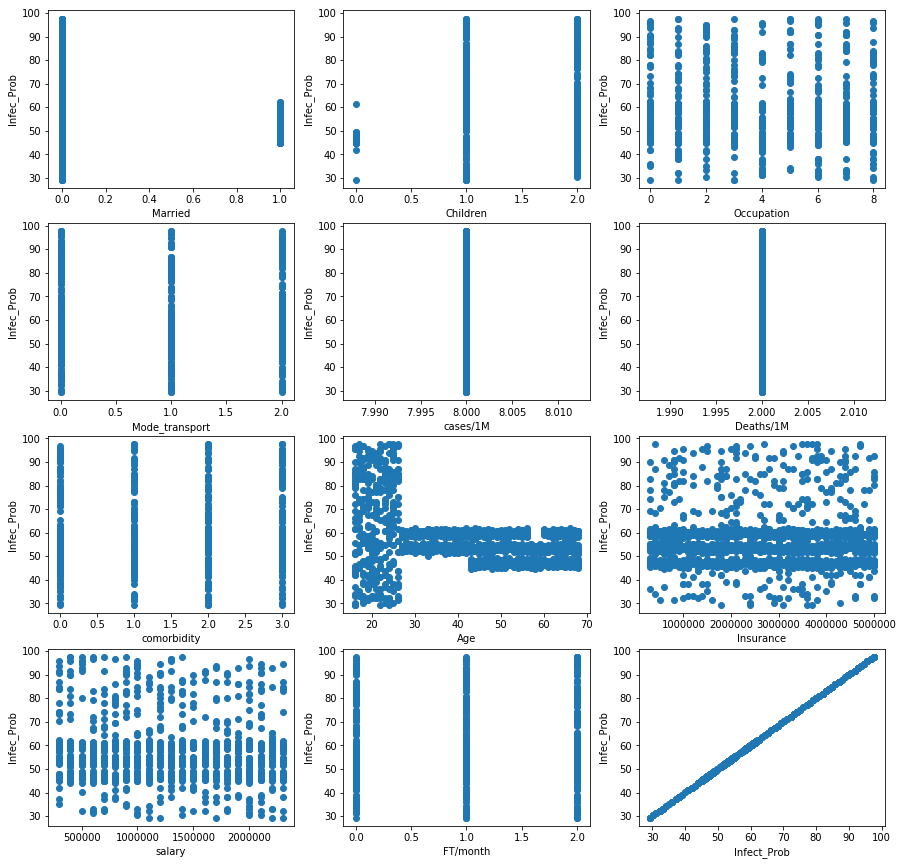

In [172]:
print("TITLE: ",reg_list[4])
plot_corrs(new_dflist[4],4,3)

# PCA

In [187]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
k_pca = KernelPCA(kernel = "rbf",n_components=5)
scaler = StandardScaler()
onehot = OneHotEncoder(sparse=False)


In [193]:
###TESTER####
#clone = clone.set_index("people_ID")
clone_contin = clone.iloc[:,[3,6,9,10,11,12]]
clone_disc =clone.iloc[:,[1,2,4,5,8]]
clone_disc = onehot.fit_transform(clone_disc)
scaled_contin = scaler.fit_transform(clone_contin)
pca_contin = k_pca.fit_transform(scaled_contin)
final_df = pd.concat([pd.DataFrame(clone_disc),pd.DataFrame(pca_contin)],axis=1)

In [195]:
final_df.head()
#clone_med = medical_df.copy()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,0,1,2,3,4
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0.347680,-0.210683,-0.157409,0.303984,0.209557
1,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,-0.009496,0.107779,-0.064269,0.293488,-0.344824
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.341280,0.115195,-0.003469,0.219990,0.092795
3,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,-0.047270,-0.121406,-0.309504,-0.474124,-0.095070
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.581153,0.074166,-0.065510,0.141811,0.104800


# Medical Data Analysis

In [135]:
clone_med = medical_df.copy()
clone_med = clone_med.set_index("people_ID")
#clone_med = clone_med.dropna()

In [136]:
clone_med.head().transpose()
clone_med.isnull().sum()

Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Infect_Prob                  0
dtype: int64

In [137]:
### Convert Pulmonary Score to numeric ####
data_arr = []
for i in (clone_med.index):
    data = clone_med["Pulmonary score"][i]
    if(data==np.nan):
        print("WUWW")
        break
    data = data.lstrip("<")
    data_arr.append(data)


In [140]:
data_arr = []
for i in (clone_med.index):
    data = clone_med["Pulmonary score"][i]
    if(data==np.nan):
        print("WUWW")
        break
    data = data.lstrip("<")
    data_arr.append(data)

df_ps = pd.DataFrame(data_arr)
df_ps.index = clone_med.index
clone_med["Pulmonary score"] = df_ps

In [145]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
arr = le.fit_transform(clone_med["cardiological pressure"])
df_cp = pd.DataFrame(arr)
df_cp.index = clone_med.index
clone_med["cardiological pressure"] = df_cp
clone_med = clone_med.astype("float32")
clone_med.head().transpose()'''

'from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\narr = le.fit_transform(clone_med["cardiological pressure"])\ndf_cp = pd.DataFrame(arr)\ndf_cp.index = clone_med.index\nclone_med["cardiological pressure"] = df_cp\nclone_med = clone_med.astype("float32")\nclone_med.head().transpose()'

In [144]:
clone_med = clone_med.drop("cardiological pressure",axis=1)
clone_med.head().transpose()

people_ID,1,2,3,4,5
Coma score,8,15,13,9,7
Pulmonary score,400,100,300,200,400
Diuresis,441,NaN,416,410,390
Platelets,154,121,124,98,21
HBB,93,56,137,167,153
d-dimer,233,328,213,275,331
Heart rate,82,89,77,64,71
HDL cholesterol,58,68,43,60,64
Charlson Index,27,5,40,27,32
Blood Glucose,7,6,6,7,7


In [146]:
clone_med_labs = clone_med["Infect_Prob"]
clone_med = clone_med.drop("Infect_Prob",axis=1)


In [179]:
### IMPUTER ON MEDICAL DATA ###
imp = SimpleImputer(missing_values=np.nan,strategy="median")
imp_data = imp.fit_transform(clone_med)
c_med_imp = pd.DataFrame(imp_data)

In [95]:
total_df = pd.concat([clone,clone_med_pca],axis=1)

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
pca = PCA(n_components=5)
k_pca = KernelPCA(n_components=5,kernel="poly")
scaler = StandardScaler()
clone_med_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(clone_med.iloc[:,:-1])))
clone_med_pca.head().transpose()

,0,1,2,3,4
0,-1.209365,-1.202869,0.669402,-1.223300,1.897398
1,0.331040,-0.251655,-1.089566,-1.474746,1.515640
2,-0.832480,-0.963830,-0.740976,-0.863625,0.478957
3,-1.788120,-1.735293,-1.480058,-0.327170,-0.168224
4,-1.530705,-1.981347,-0.066248,1.022680,-2.529055


In [240]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(clone_med_pca,clone_med.iloc[:,-1],test_size=0.2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_med,X_test_med,Y_train_med,Y_test_med = train_test_split(c_med_imp,clone_med_labs,test_size=0.2)

X_train.shape

(7839, 11)

In [241]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
model1 = DecisionTreeRegressor()
model2 = SVR(kernel="poly")
model3 = RandomForestRegressor(n_estimators=10)
xgb = XGBRegressor()

xgb.fit(X_train_med,Y_train_med)
y_pred = xgb.predict(X_test_med)

from sklearn.metrics import r2_score
r2_score(Y_test_med,y_pred)


[16:19:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-0.008326677372594515

In [197]:
##### NN ######
from keras.models import Sequential
from keras.layers import Dense,Input,BatchNormalization
from keras.regularizers import l1,l2
model = Sequential()
model.add(Dense(8,input_shape=(10,),activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(4,activation="relu"))
model.add(BatchNormalization())
#model.add(Dense(16,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(1,activation="linear"))

In [198]:
model.compile(optimizer="Adam",loss="mean_squared_logarithmic_error",metrics=["mse"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
batch_normalization_5 (Batch (None, 4)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 145
Trainable params: 137
Non-trainable params: 8
_________________________________________________________________


In [199]:
model.fit(X_train,Y_train,validation_data=[X_test,Y_test],epochs=50)

Train on 8571 samples, validate on 2143 samples
Epoch 1/50
8571/8571 [==============================] - 1s 82us/step - loss: 12.1018 - mse: 2810.6565 - val_loss: 10.5877 - val_mse: 2753.6948
Epoch 2/50
8571/8571 [==============================] - 0s 42us/step - loss: 9.1021 - mse: 2697.7249 - val_loss: 7.5276 - val_mse: 2603.8970
Epoch 3/50
8571/8571 [==============================] - 0s 41us/step - loss: 6.5148 - mse: 2523.1167 - val_loss: 5.3982 - val_mse: 2422.8696
Epoch 4/50
8571/8571 [==============================] - 0s 42us/step - loss: 4.6849 - mse: 2325.2512 - val_loss: 4.0132 - val_mse: 2245.1602
Epoch 5/50
8571/8571 [==============================] - 0s 42us/step - loss: 3.4358 - mse: 2127.6165 - val_loss: 2.9959 - val_mse: 2046.7935
Epoch 6/50
8571/8571 [==============================] - 0s 43us/step - loss: 2.6233 - mse: 1939.7609 - val_loss: 2.3171 - val_mse: 1862.2054
Epoch 7/50
8571/8571 [==============================] - 0s 43us/step - loss: 2.0557 - mse: 1761.9343 - v

In [200]:
y_pred = model.predict(X_test)
r2_score(Y_test,y_pred)

-0.012057964154000178

In [181]:
final_df = pd.concat([clone,c_med_imp],axis=1)
f_df = final_df.dropna()
f_df.shape

(8710, 21)

IndexError: index 11 is out of bounds for axis 0 with size 11

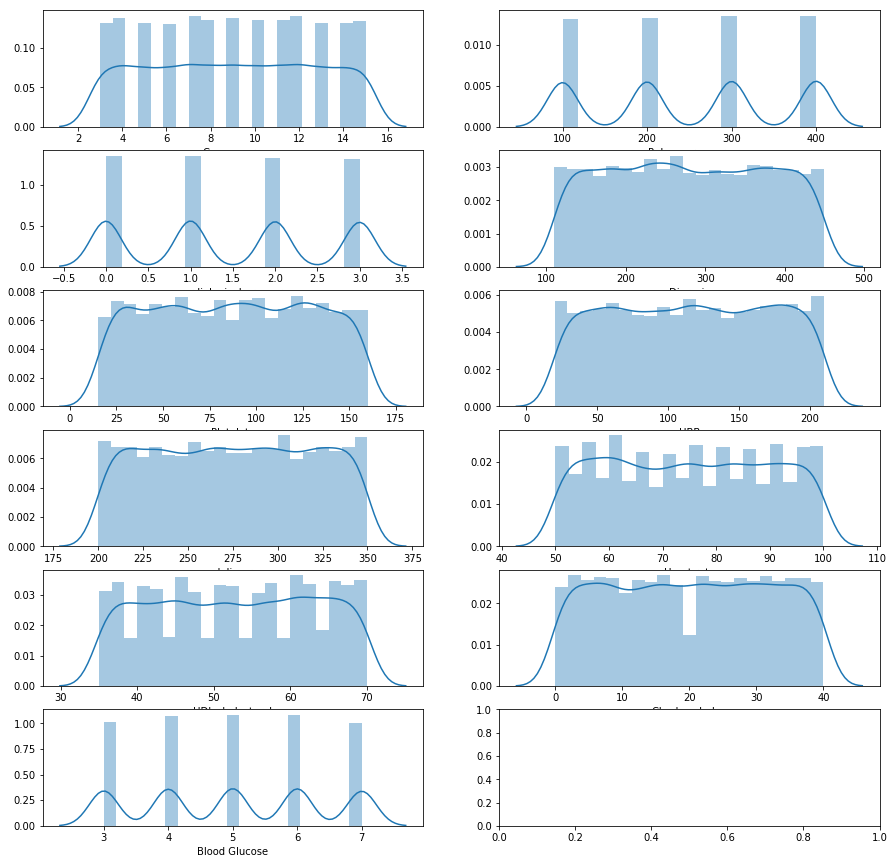

In [128]:
fig,ax = plt.subplots(6,2,figsize=(15,15))
index=0
for i in range(6):
    for j in range(2):
        sns.distplot(clone_med[clone_med.columns[index]],ax=ax[i,j])
        index+=1

IndexError: index 11 is out of bounds for axis 0 with size 11

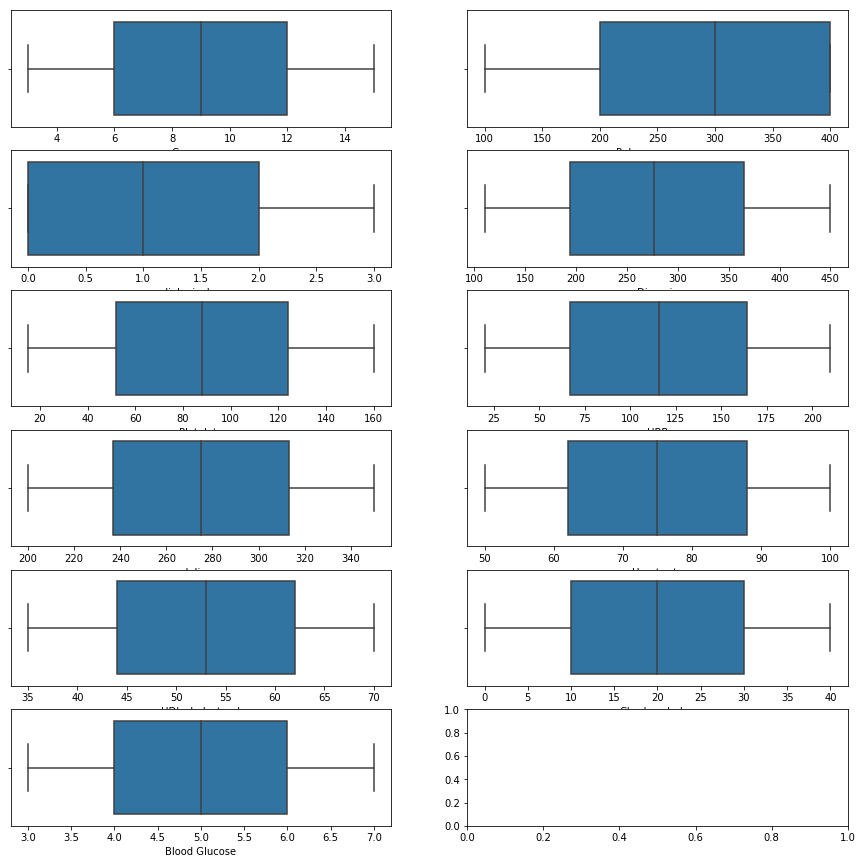

In [129]:
fig,ax = plt.subplots(6,2,figsize=(15,15))
index=0
for i in range(6):
    for j in range(2):
        sns.boxplot(clone_med[clone_med.columns[index]],ax=ax[i,j])
        index+=1

In [103]:
#df = df.set_index("people_ID")
df_labs = df["Infect_Prob"]
t_df = pd.concat([total_df,df_labs],axis=1)
t_df =t_df.dropna()

In [72]:
from sklearn.decomposition import KernelPCA,PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder

k_pca = KernelPCA(kernel = "poly",n_components=5)
pca = PCA(n_components=5)
scaler = StandardScaler()
onehot = OneHotEncoder(sparse=False)


In [119]:
med_labs = clone_med["Infect_Prob"]
clone_med = clone_med.drop(["Infect_Prob"],axis=1)
scaled = scaler.fit_transform(clone_med.iloc[:,:-1])

scaled_pca = pca.fit_transform(scaled)

scaled_med = pd.DataFrame(scaled_pca)


In [120]:
scaled_med.head()

,0,1,2,3,4
0,-1.223621,-0.428220,-1.758159,-1.400240,-0.387512
1,-1.210317,0.181546,-1.802106,-1.854836,-0.202148
2,0.655356,1.004442,-1.475539,-0.035219,0.284061
3,-1.236824,1.461385,-0.948060,0.817906,1.070896
4,1.897402,-1.547015,0.283426,-2.327900,-1.166033


# Dummy Model - Medical

In [123]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

X_train,X_test,Y_train,Y_test = train_test_split(scaled_med,clone_med.iloc[:,-1],test_size=0.2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model1 = DecisionTreeRegressor()
model3 = RandomForestRegressor(n_estimators=10)
model1.fit(X_train,Y_train)
y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)


-1.1120398709855701

In [113]:
#comparison_df = np.concatenate((y_pred.reshape(-1,1),Y_test.reshape(-1,1)),axis=1)
#pd.DataFrame(comparison_df)
#pca.fit_transform(scaler.fit_transform(X_test)

In [253]:
#df = df.set_index("people_ID")
df_nnull = df.dropna()
normie_df_nnull = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,23,24,25,26]]
medical_df_nnull = df.iloc[:,[12,13,14,15,16,17,18,19,20,21,22,26]]
labels = df.iloc[:,-1]

In [261]:
#normie_df_nnull.index = df.index
normie_df_nnull.head().transpose()

people_ID,1,2,3,4,5
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes
Age,68,64,19,33,23
Insurance,3.6e+06,1.6e+06,3.4e+06,700000,3.2e+06
salary,1300000,400000,900000,2300000,1100000


In [256]:
medical_df_nnull.index = df.index
medical_df_nnull.head()

,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Infect_Prob
people_ID,,,,,,,,,,,,
1,8,<400,Normal,441,154,93,233,82,58,27,7,49.135010
2,15,<100,Stage-02,NaN,121,56,328,89,68,5,6,51.147880
3,13,<300,Elevated,416,124,137,213,77,43,40,6,73.224000
4,9,<200,Stage-01,410,98,167,275,64,60,27,7,48.779225
5,7,<400,Normal,390,21,153,331,71,64,32,7,87.868800


In [266]:
#normie_df_nnull = normie_df_nnull.drop(["Designation"],axis=1)
#normie_df_nnull = normie_df_nnull.drop(labels=["Name"],axis=1)
#normie_df_nnull = normie_df_nnull.set_index("people_ID")
#normie_df_nnull = normie_df_nnull.drop(labels=["Region"],axis=1)
#normie_df_nnull = normie_df_nnull.drop(labels=["Deaths/1M"],axis=1)
#normie_df = normie_df_nnull.dropna()
new_df_nnull,col_names = transform(normie_df_nnull.dropna(),[0,1,3,4,6],0)
clone = normie_df_nnull.copy()
clone.head().transpose()
for key in new_df.keys():
    if(key!="people_ID"):
        clone[key] = new_df[key]



ValueError: Length of values does not match length of index